In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X + bias

print(X[:10], y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [ ]:
train_split=int(0.8*len(X))

X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train)

(40, 40)

In [ ]:
def plot_predictions (train_data = X_train,
                      train_labels = y_train,
                      test_data=X_test,
                      test_labels = y_test,
                      predictions = None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels, c="b", s=4, label='Training data')
  plt.scatter(test_data,test_labels, c="g",s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  plt.legend(prop={"size":14});

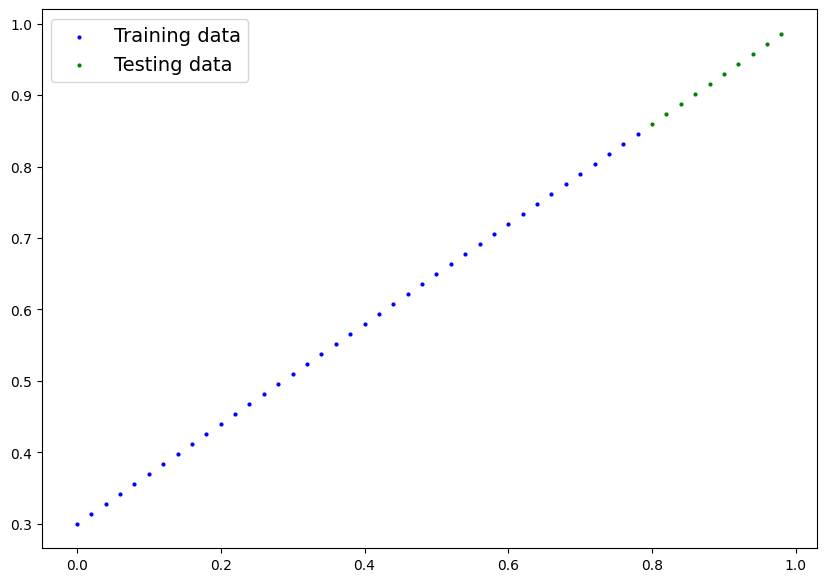

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test)

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

    self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) #

    # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
      return self.weights * x + self.bias # <- this is the li

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

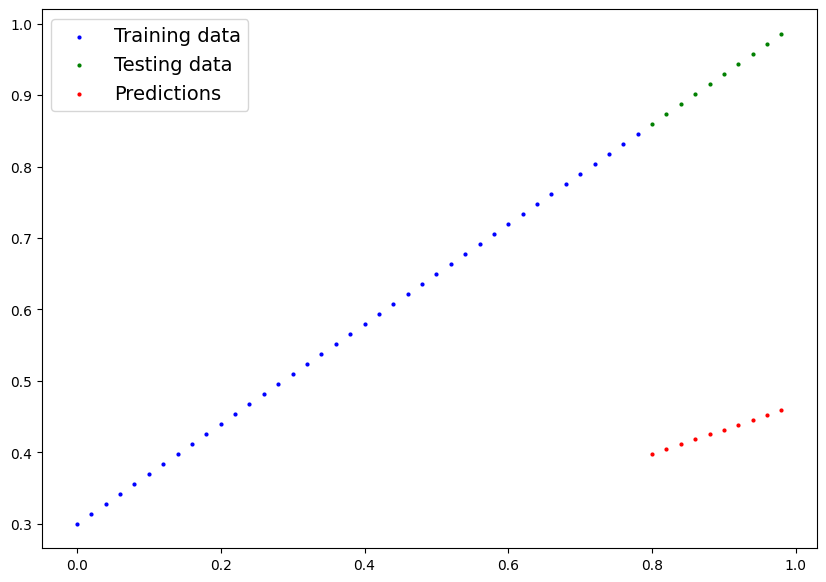

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [ ]:
torch.manual_seed(42)

epochs = 1000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 100 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE train Loss: {loss} | MAE Test loss: {test_loss}")

Epoch: 0 | MAE train Loss: 0.31288138031959534 | MAE Test loss: 0.48106518387794495
Epoch: 100 | MAE train Loss: 0.024458957836031914 | MAE Test loss: 0.05646304413676262
Epoch: 200 | MAE train Loss: 0.008932482451200485 | MAE Test loss: 0.005023092031478882
Epoch: 300 | MAE train Loss: 0.008932482451200485 | MAE Test loss: 0.005023092031478882
Epoch: 400 | MAE train Loss: 0.008932482451200485 | MAE Test loss: 0.005023092031478882
Epoch: 500 | MAE train Loss: 0.008932482451200485 | MAE Test loss: 0.005023092031478882
Epoch: 600 | MAE train Loss: 0.008932482451200485 | MAE Test loss: 0.005023092031478882
Epoch: 700 | MAE train Loss: 0.008932482451200485 | MAE Test loss: 0.005023092031478882
Epoch: 800 | MAE train Loss: 0.008932482451200485 | MAE Test loss: 0.005023092031478882
Epoch: 900 | MAE train Loss: 0.008932482451200485 | MAE Test loss: 0.005023092031478882


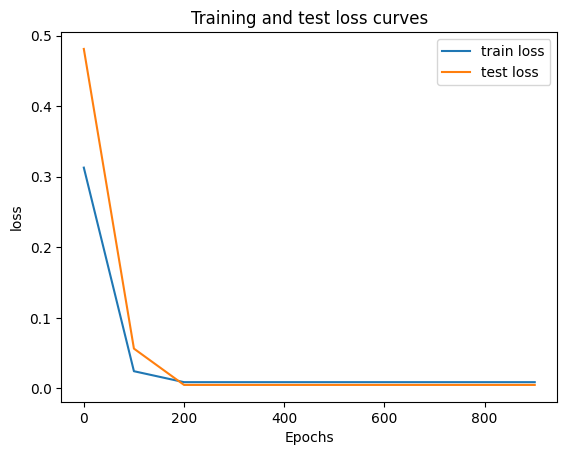

In [ ]:
plt.plot(epoch_count, train_loss_values, label = "train loss")
plt.plot(epoch_count, test_loss_values, label = 'test loss')
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


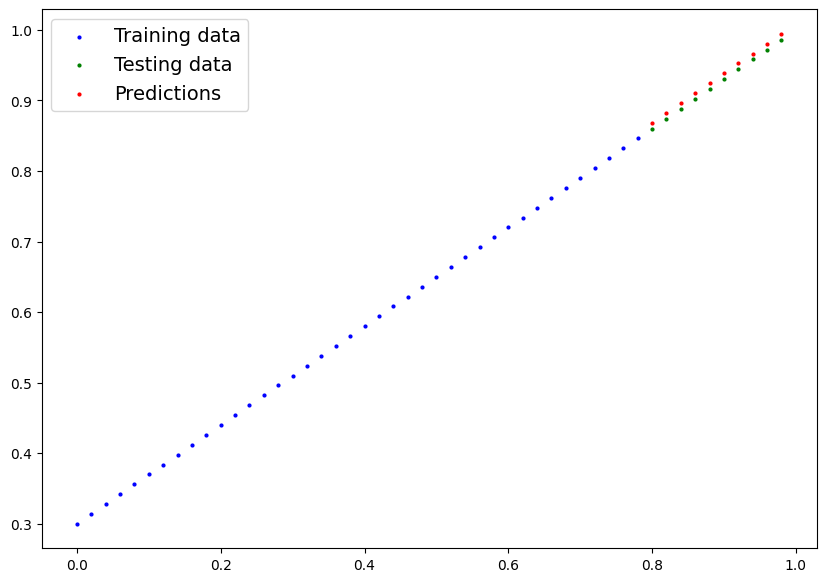

In [ ]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions = y_preds)

In [ ]:
print("saving model:")
torch.save(obj = model_0.state_dict(),
           f='SAVE_PATH')

saving model:


In [ ]:
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV1()
model_1, model_1.state_dict()

(LinearRegressionModelV1(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01)




In [ ]:
next(model_1.parameters()).device


device(type='cpu')

In [ ]:
device='cpu'
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train() # train mode is on

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # testing
  model_1.eval() # put model in evaluation mode
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch %100 == 0:
      print(f"Epoch: {epoch} | train Loss: {loss} | test Loss: {test_loss}")




Epoch: 0 | train Loss: 0.5551779866218567 | test Loss: 0.5739762187004089
Epoch: 100 | train Loss: 0.006215679459273815 | test Loss: 0.014086711220443249
Epoch: 200 | train Loss: 0.0012645035749301314 | test Loss: 0.013801807537674904
Epoch: 300 | train Loss: 0.0012645035749301314 | test Loss: 0.013801807537674904
Epoch: 400 | train Loss: 0.0012645035749301314 | test Loss: 0.013801807537674904
Epoch: 500 | train Loss: 0.0012645035749301314 | test Loss: 0.013801807537674904
Epoch: 600 | train Loss: 0.0012645035749301314 | test Loss: 0.013801807537674904
Epoch: 700 | train Loss: 0.0012645035749301314 | test Loss: 0.013801807537674904
Epoch: 800 | train Loss: 0.0012645035749301314 | test Loss: 0.013801807537674904
Epoch: 900 | train Loss: 0.0012645035749301314 | test Loss: 0.013801807537674904


In [ ]:
print(model_1.state_dict())


OrderedDict([('linear_layer.weight', tensor([[0.6968]])), ('linear_layer.bias', tensor([0.3025]))])


In [ ]:
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

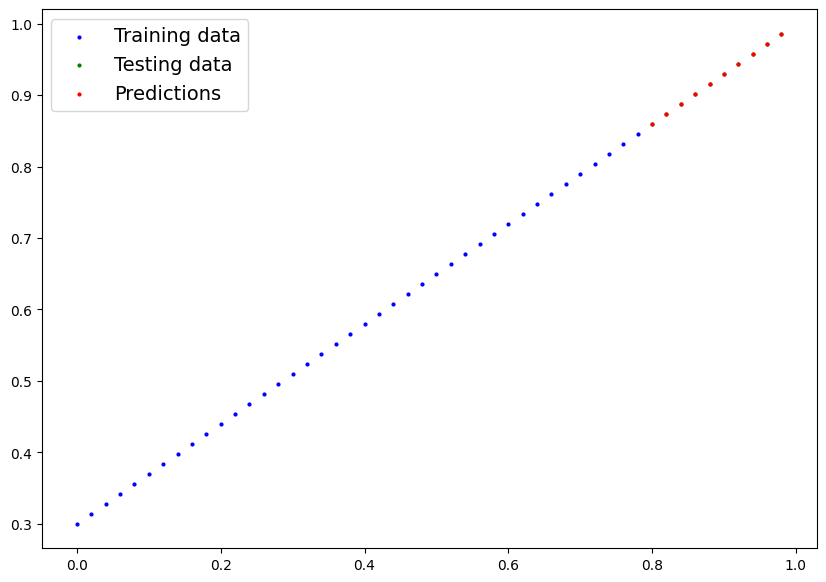

In [ ]:
plot_predictions(predictions=y_preds.cpu())

#Building a model with Non linearity


In [8]:
import requests
from pathlib import Path
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary



helper_functions.py already exists, skipping download


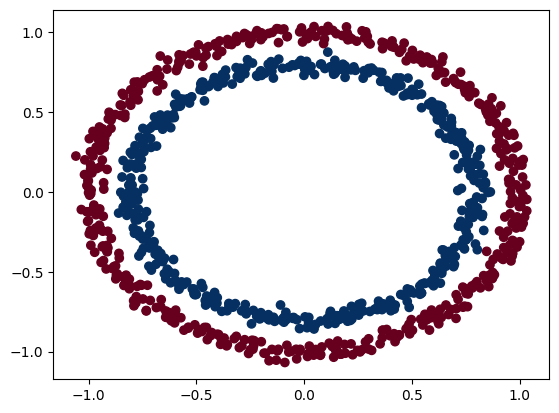

In [2]:
from torch import nn
from sklearn.datasets import make_circles

n_samples = 1000

X,y  = make_circles(n_samples,
                    noise = 0.03,
                    random_state= 42)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [3]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/ len(y_pred))*100
  return acc

In [4]:

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [5]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [6]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr = 0.01)


In [7]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)

X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #model_3.train()
  y_logits  = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss= loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss  = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn( y_test, test_pred)
    #print(test_acc)
    if epoch %100 == 0:
      print(f'Epoch: {epoch}  | Loss: {loss: .5f} | Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%')

Epoch: 0  | Loss:  0.70169 | Accuracy: 50.00% | Test loss: 0.70152, Test acc: 50.00%
Epoch: 100  | Loss:  0.69690 | Accuracy: 50.00% | Test loss: 0.69676, Test acc: 50.00%
Epoch: 200  | Loss:  0.69447 | Accuracy: 50.00% | Test loss: 0.69429, Test acc: 50.00%
Epoch: 300  | Loss:  0.69315 | Accuracy: 50.00% | Test loss: 0.69295, Test acc: 50.00%
Epoch: 400  | Loss:  0.69240 | Accuracy: 50.00% | Test loss: 0.69218, Test acc: 50.00%
Epoch: 500  | Loss:  0.69195 | Accuracy: 50.00% | Test loss: 0.69168, Test acc: 50.00%
Epoch: 600  | Loss:  0.69166 | Accuracy: 50.00% | Test loss: 0.69135, Test acc: 50.00%
Epoch: 700  | Loss:  0.69145 | Accuracy: 47.62% | Test loss: 0.69110, Test acc: 48.00%
Epoch: 800  | Loss:  0.69129 | Accuracy: 49.75% | Test loss: 0.69089, Test acc: 49.00%
Epoch: 900  | Loss:  0.69115 | Accuracy: 51.25% | Test loss: 0.69070, Test acc: 47.50%


In [ ]:
"""# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")"""

Epoch: 0 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68941, Test Accuracy: 55.00%
Epoch: 100 | Loss: 0.68962, Accuracy: 53.87% | Test Loss: 0.68922, Test Accuracy: 55.00%
Epoch: 200 | Loss: 0.68945, Accuracy: 55.12% | Test Loss: 0.68903, Test Accuracy: 56.00%
Epoch: 300 | Loss: 0.68929, Accuracy: 54.87% | Test Loss: 0.68883, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68911, Accuracy: 53.75% | Test Loss: 0.68863, Test Accuracy: 56.00%
Epoch: 500 | Loss: 0.68893, Accuracy: 53.50% | Test Loss: 0.68841, Test Accuracy: 56.00%
Epoch: 600 | Loss: 0.68875, Accuracy: 53.50% | Test Loss: 0.68819, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.68856, Accuracy: 53.25% | Test Loss: 0.68797, Test Accuracy: 56.00%
Epoch: 800 | Loss: 0.68836, Accuracy: 53.25% | Test Loss: 0.68773, Test Accuracy: 56.00%
Epoch: 900 | Loss: 0.68815, Accuracy: 53.00% | Test Loss: 0.68749, Test Accuracy: 56.00%


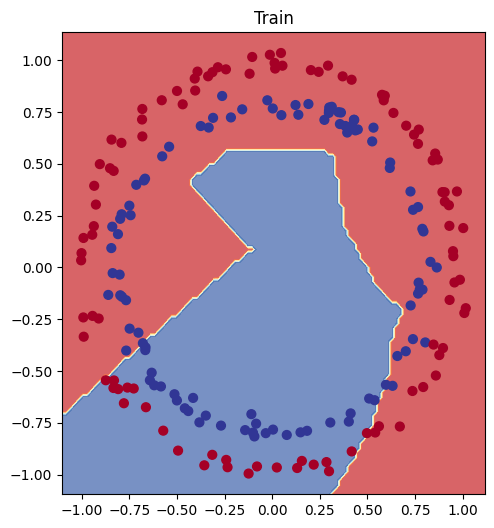

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_test,y_test)